In [1]:
import pandas as pd
import seaborn as sns
import os
import utils
import matplotlib.pyplot as plt
import seaborn.objects as so
import plotly.express as px
import kaleido
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv(os.path.join('data','cleaned_responses.csv'))
if not os.path.exists('figures'):
    os.makedirs('figures') #for outputs

In [3]:
# confirm no missing values in the question column
question_col = 'Which of the following do you have significant formal training in or experience with? Select all that apply.'
assert len(data[question_col].unique()) == len(data.dropna(subset=[question_col])[question_col].unique())

/Users/eweisbar/Desktop/github/2024_Bridging_Imaging_Users_to_Imaging_Analysis_Survey/utils.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('',inplace=True)


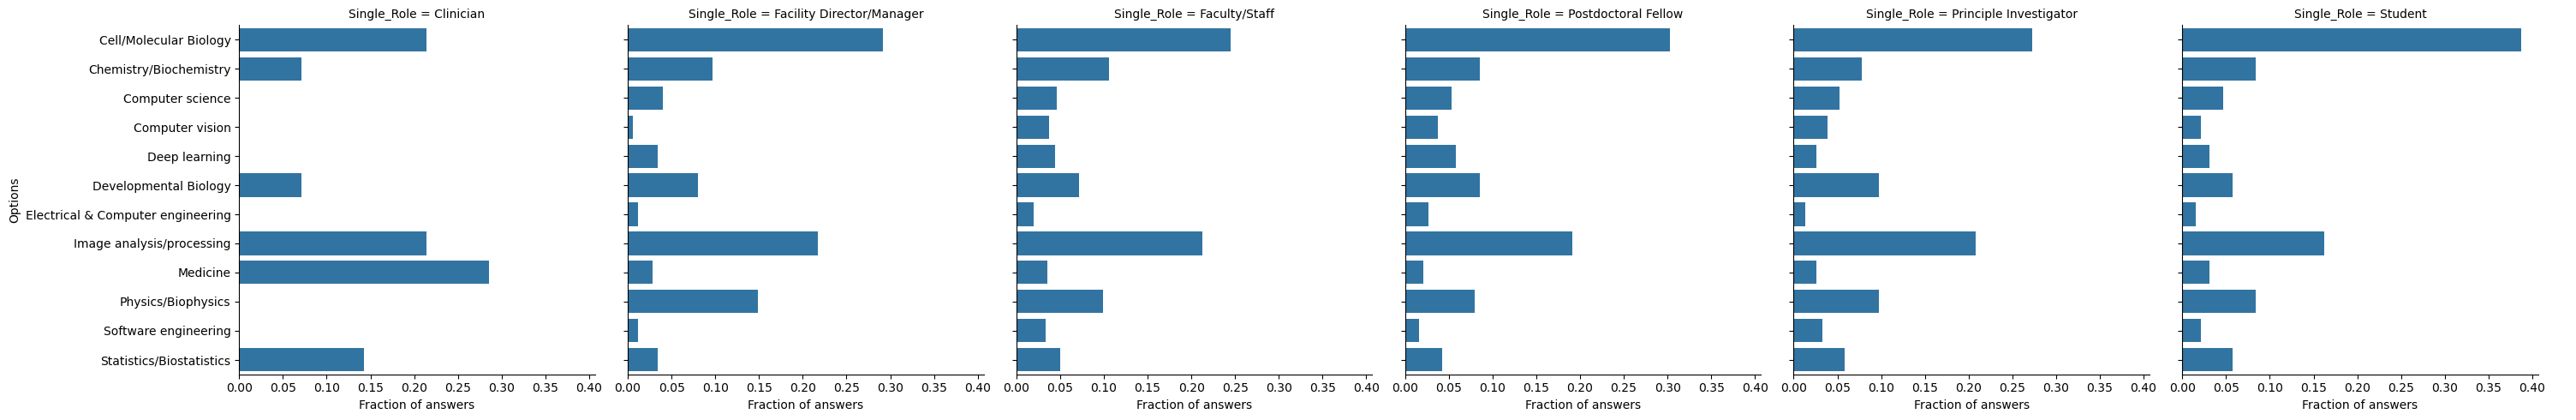

In [4]:
utils.select_all_that_apply_hist_facet(df=data,
                                    question_col='Which of the following do you have significant formal training in or experience with? Select all that apply.',
                                    facet_col='Single_Role',
                                    plot_filename='figures/Formal_Training_by_Role.png',
                                    drop_empty=False,
                                    )

/Users/eweisbar/Desktop/github/2024_Bridging_Imaging_Users_to_Imaging_Analysis_Survey/utils.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('',inplace=True)


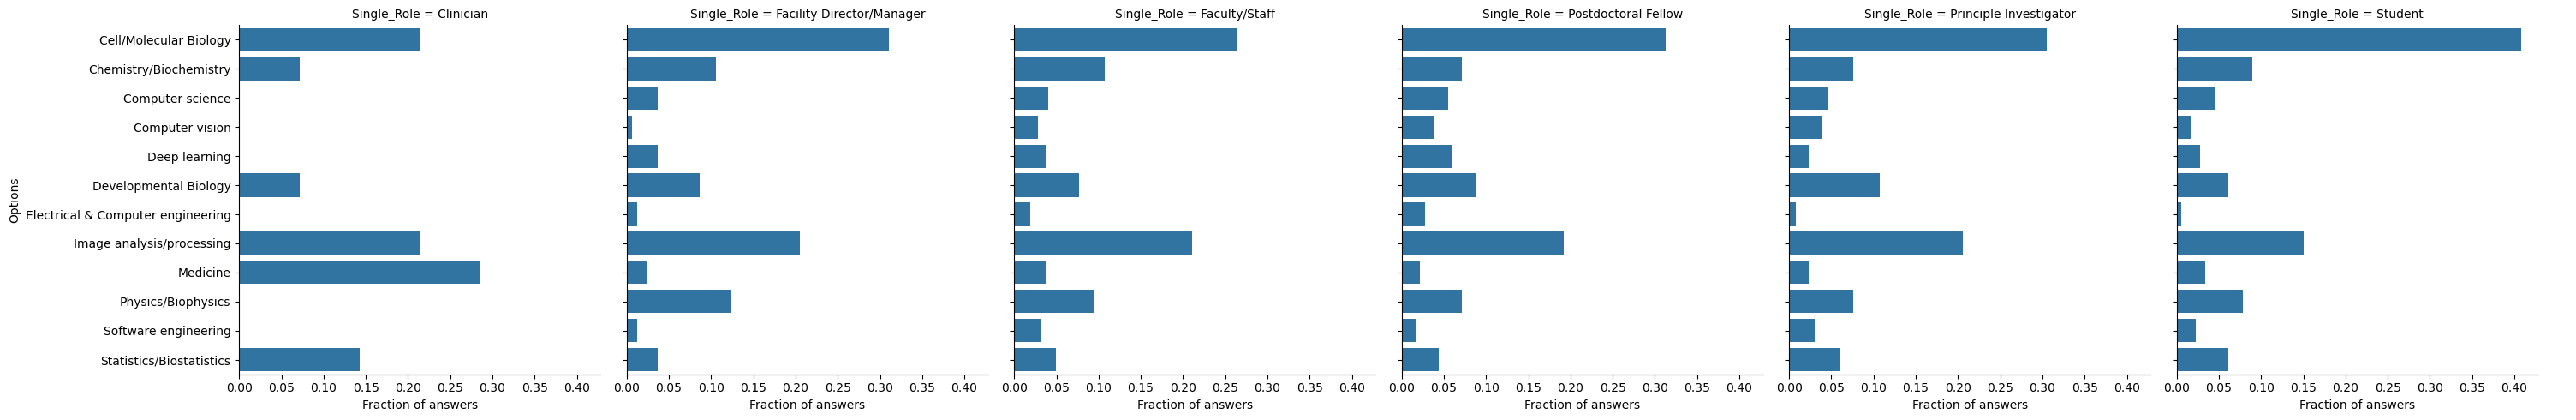

In [5]:
utils.select_all_that_apply_hist_facet(df=data.loc[data["Science_Cat"]=='Life Sciences'],
                                    question_col='Which of the following do you have significant formal training in or experience with? Select all that apply.',
                                    facet_col='Single_Role',
                                    plot_filename='figures/Formal_Training_by_Role_LifeSciences.png',
                                    drop_empty=False,
                                    )

/Users/eweisbar/Desktop/github/2024_Bridging_Imaging_Users_to_Imaging_Analysis_Survey/utils.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('',inplace=True)


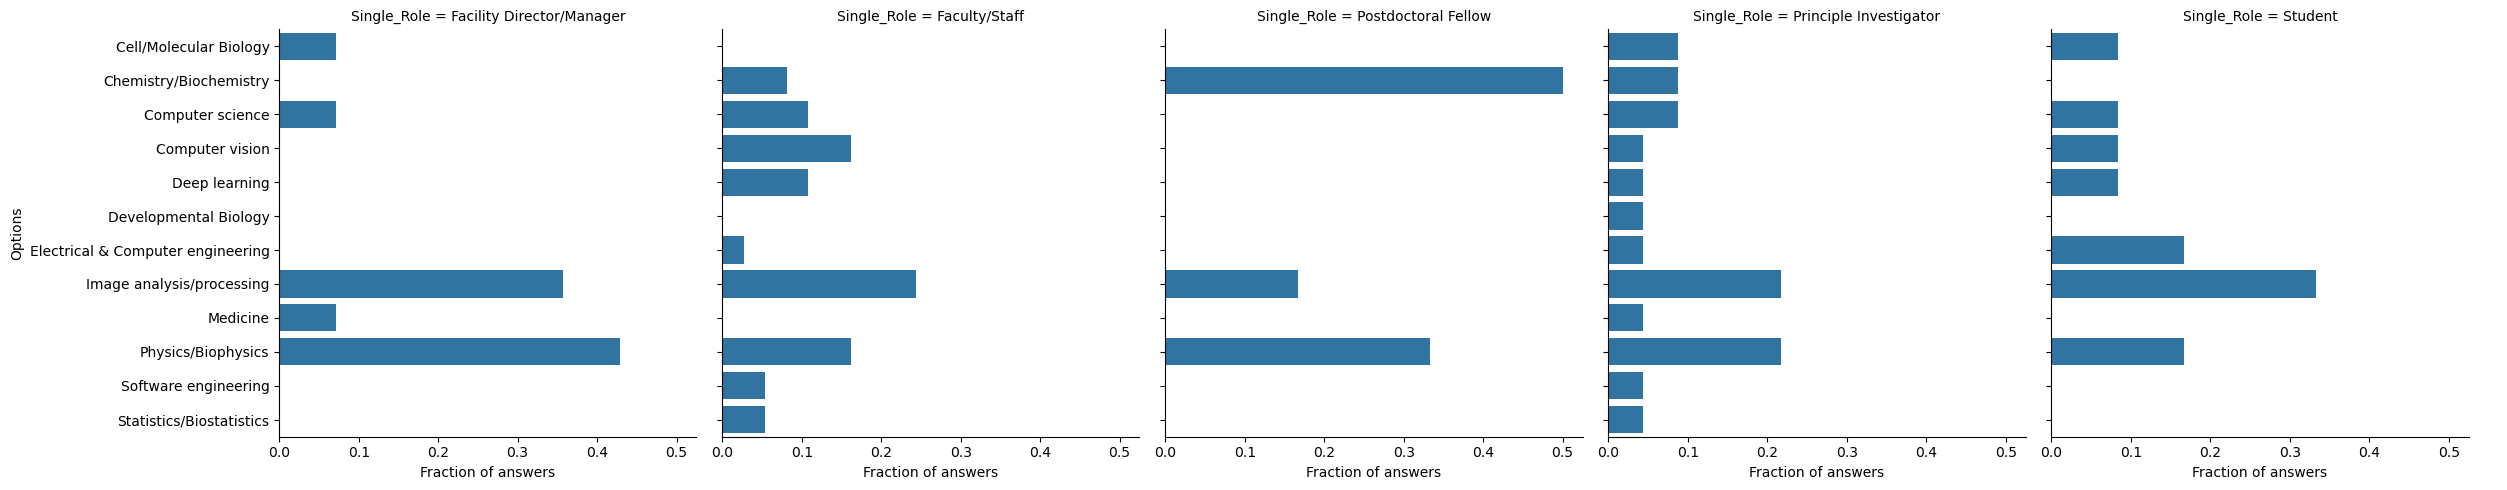

In [6]:
utils.select_all_that_apply_hist_facet(df=data.loc[data["Science_Cat"]=='Physical Sciences'],
                                    question_col='Which of the following do you have significant formal training in or experience with? Select all that apply.',
                                    facet_col='Single_Role',
                                    plot_filename='figures/Formal_Training_by_Role_PhysicalSciences.png',
                                    drop_empty=False,
                                    )

In [7]:
df_grouped = utils.make_counts_per_multiselect_group(data, 
                                         single_select_col= 'Single_Role',
                                         multi_select_col= 'Which of the following do you have significant formal training in or experience with? Select all that apply.')
df_grouped_PS = utils.make_counts_per_multiselect_group(data.loc[data["Science_Cat"]=='Physical Sciences'],
                                         single_select_col= 'Single_Role',
                                         multi_select_col= 'Which of the following do you have significant formal training in or experience with? Select all that apply.')
df_grouped_LS = utils.make_counts_per_multiselect_group(data.loc[data["Science_Cat"]=='Life Sciences'],
                                         single_select_col= 'Single_Role',
                                         multi_select_col= 'Which of the following do you have significant formal training in or experience with? Select all that apply.')
df_grouped

,Single_Role,Software engineering,Chemistry/Biochemistry,Developmental Biology,Computer science,Computer vision,Statistics/Biostatistics,Medicine,Cell/Molecular Biology,Deep learning,Physics/Biophysics,Electrical & Computer engineering,Image analysis/processing
0,Clinician,0.0,1.0,1.0,0.0,0.0,2.0,4.0,3.0,0.0,0.0,0.0,3.0
1,Facility Director/Manager,2.0,17.0,14.0,7.0,1.0,6.0,5.0,51.0,6.0,26.0,2.0,38.0
2,Faculty/Staff,17.0,53.0,36.0,23.0,19.0,25.0,18.0,123.0,22.0,50.0,10.0,107.0
3,Postdoctoral Fellow,3.0,16.0,16.0,10.0,7.0,8.0,4.0,57.0,11.0,15.0,5.0,36.0
4,Principle Investigator,5.0,12.0,15.0,8.0,6.0,9.0,4.0,42.0,4.0,15.0,2.0,32.0
5,Student,4.0,16.0,11.0,9.0,4.0,11.0,6.0,74.0,6.0,16.0,3.0,31.0


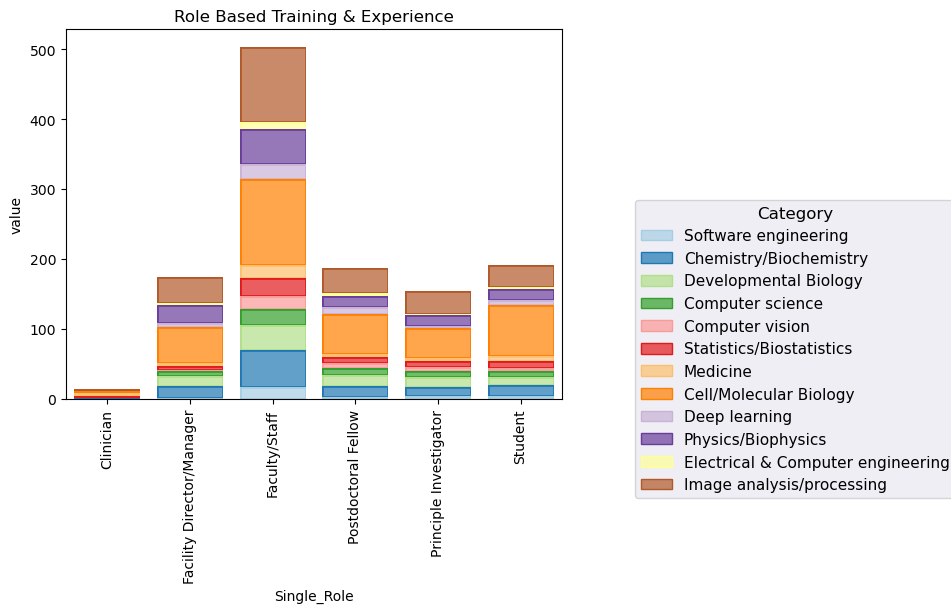

In [8]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Category',
                           plottitle = 'Role Based Training & Experience',
                           plot_filename=os.path.join('figures','Role_Based_Training_by_Category.png'))

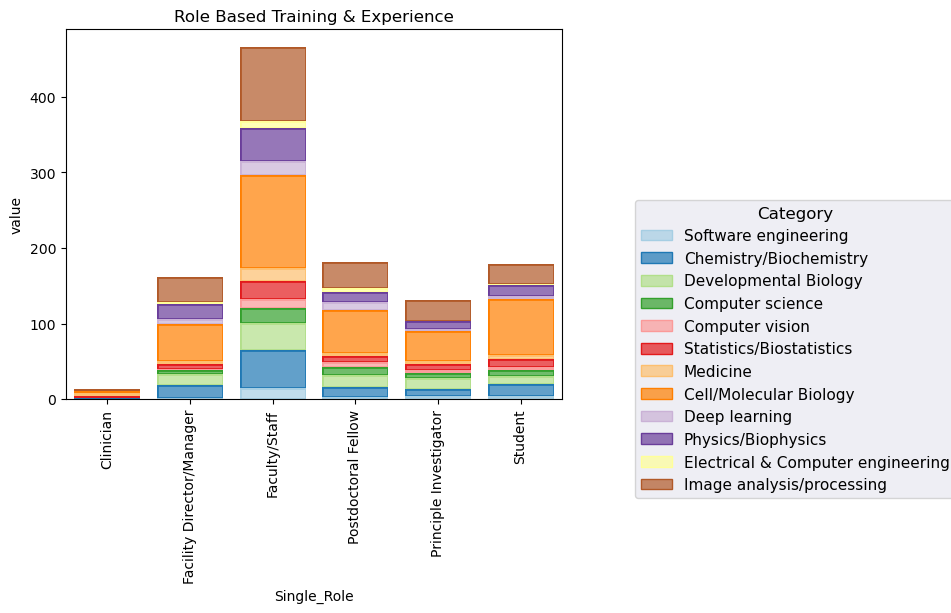

In [9]:
utils.plot_single_vs_multi(df_grouped_LS,
                           legend_title = 'Category',
                           plottitle = 'Role Based Training & Experience',
                           plot_filename=os.path.join('figures','Role_Based_Training_by_Category_LS.png'))

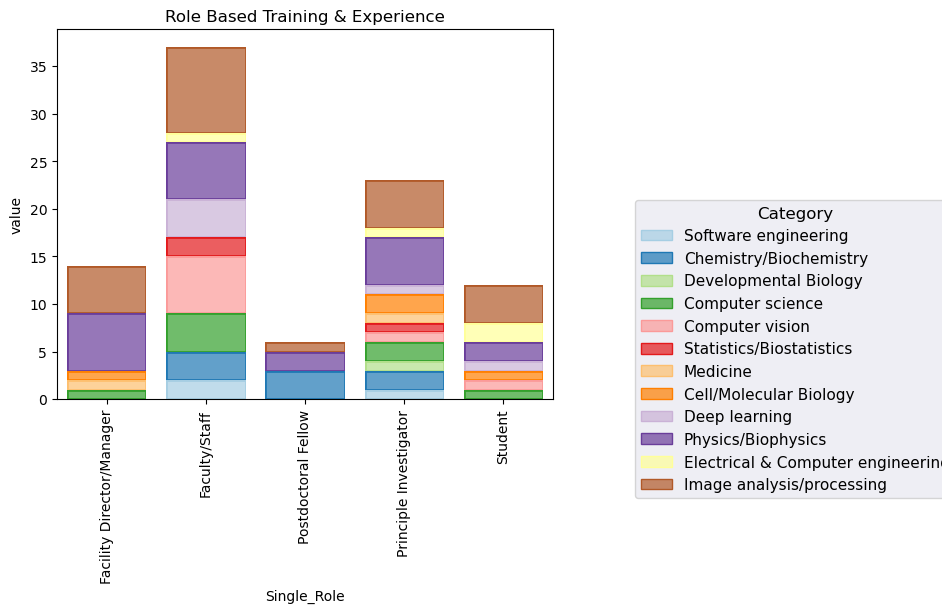

In [10]:
utils.plot_single_vs_multi(df_grouped_PS,
                           legend_title = 'Category',
                           plottitle = 'Role Based Training & Experience',
                           plot_filename=os.path.join('figures','Role_Based_Training_by_Category_PS.png'))

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


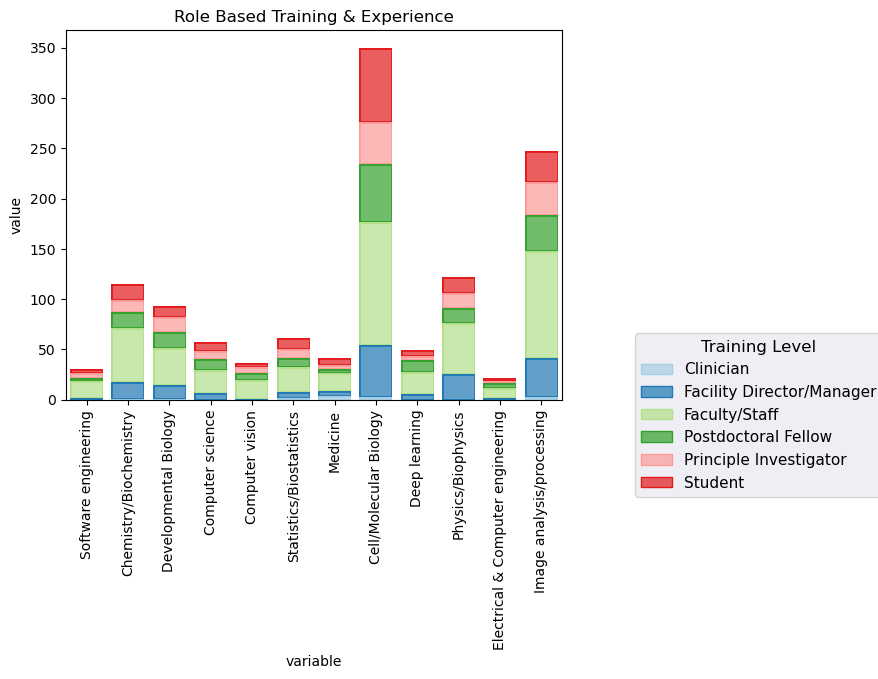

In [11]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Training Level',
                           plottitle = 'Role Based Training & Experience',
                           groupbyfirstcol=False,
                           plot_filename=os.path.join('figures','Role_Based_Training_by_Training.png'))

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


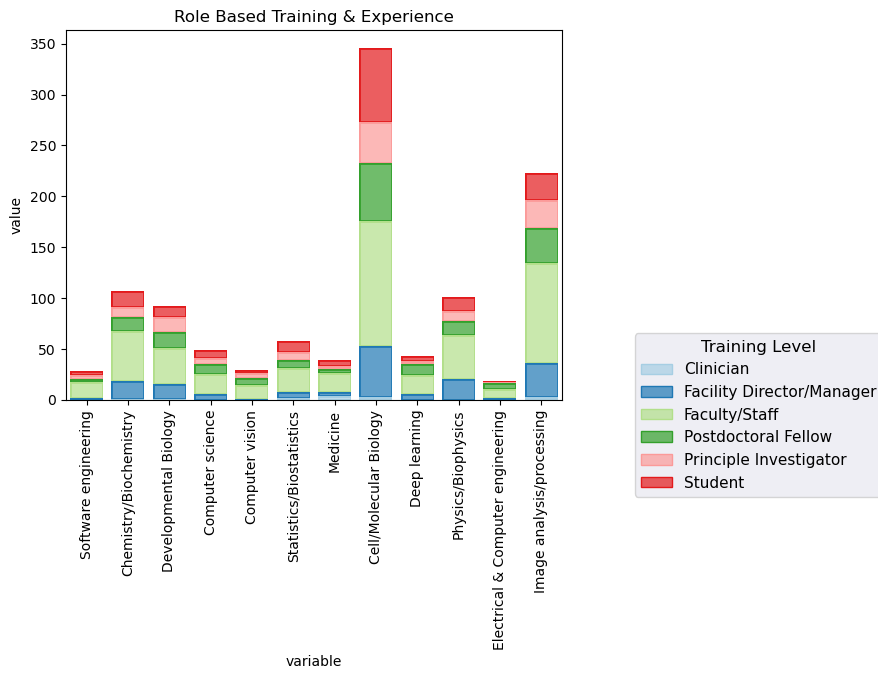

In [12]:
utils.plot_single_vs_multi(df_grouped_LS,
                           legend_title = 'Training Level',
                           plottitle = 'Role Based Training & Experience',
                           groupbyfirstcol=False,
                           plot_filename=os.path.join('figures','Role_Based_Training_by_Training_LS.png'))

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


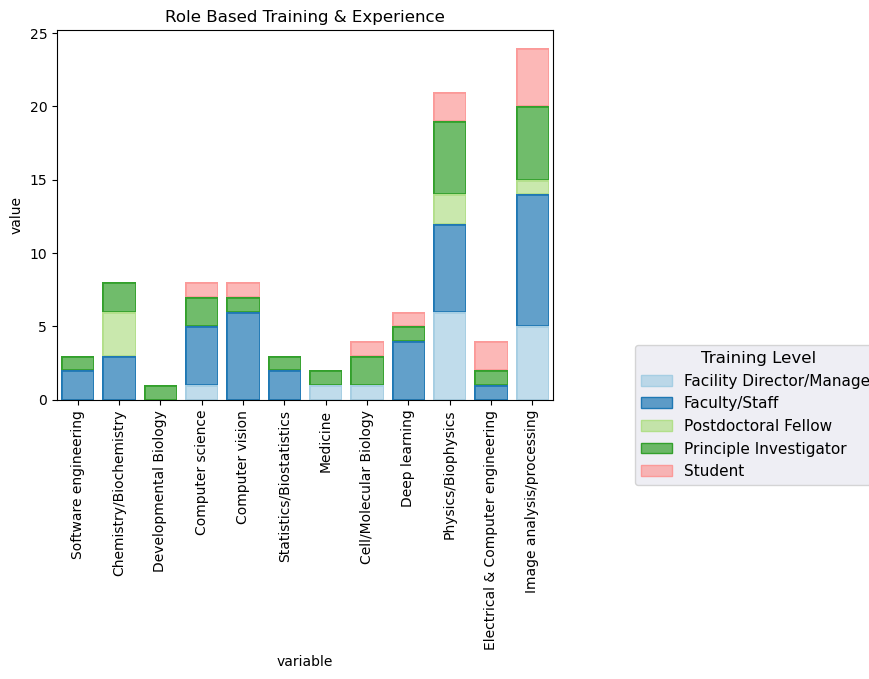

In [13]:
utils.plot_single_vs_multi(df_grouped_PS,
                           legend_title = 'Training Level',
                           plottitle = 'Role Based Training & Experience',
                           groupbyfirstcol=False,
                           plot_filename=os.path.join('figures','Role_Based_Training_by_Training_PS.png'))

In [14]:
col_list = ['How would you describe your work?','How would you rate your computational skills?',
       'How would you rate your comfort in developing new computational skills?',
       'How manual would you say your current typical analysis workflow(s) are? ']
df = data[['Single_Role']+col_list+['Work','Computation','Comfort','Manual']]
df.head()

,Single_Role,How would you describe your work?,How would you rate your computational skills?,How would you rate your comfort in developing new computational skills?,How manual would you say your current typical analysis workflow(s) are?,Work,Computation,Comfort,Manual
0,Principle Investigator,7,6,7,7.0,Analyst,High Skill,High Comfort,Highly Manual
1,Faculty/Staff,7,3,5,4.0,Analyst,Medium Skill,Medium Comfort,Variable Automation
2,Student,6,6,7,6.0,Analyst,High Skill,High Comfort,Highly Manual
3,Faculty/Staff,6,4,4,4.0,Analyst,Medium Skill,Medium Comfort,Variable Automation
4,Faculty/Staff,6,5,6,4.0,Analyst,Medium Skill,High Comfort,Variable Automation


In [15]:
# drop 2 respondents that left "How manual ..." blank
print (df.shape) 
df = df.loc[df['How manual would you say your current typical analysis workflow(s) are? ']!='']
print (df.shape)
df = df[['Work','Computation','Comfort','Manual']]
df = df.value_counts().to_frame().reset_index()
df.head()

(483, 9)
(481, 9)


,Work,Computation,Comfort,Manual,count
0,Balanced,Medium Skill,Medium Comfort,Variable Automation,89
1,Balanced,Medium Skill,High Comfort,Variable Automation,39
2,Imaging,Medium Skill,Medium Comfort,Variable Automation,29
3,Analyst,High Skill,High Comfort,Highly Manual,28
4,Balanced,High Skill,High Comfort,Variable Automation,25


In [16]:
title = "Skills of the participants"

fig = px.sunburst(df, path=['Work','Computation','Comfort'],color='Work', values='count', width=500, height=500)
fig.update_traces(textinfo="label+percent parent", insidetextorientation = 'radial', sort=True)
fig.update_layout(title=title, title_x=0.5, font=dict(family='Helvetica', color="Black", size=12))
fig.write_image('figures/Participant_Skills_3tier.png')
fig.show()

In [17]:
import plotly.express as px
title = "Skills of the participants"

fig = px.sunburst(df, path=['Work','Computation','Comfort','Manual'],color='Work', values='count', width=500, height=500,)
fig.update_traces(textinfo="label+percent parent", insidetextorientation = 'radial', sort=True)
fig.update_layout(title=title, title_x=0.5, font=dict(family='Helvetica', color="Black", size=12))
fig.write_image('figures/Participant_Skills_4tier.png')
fig.show()